#### Reading the file

In [1]:
import os
import pandas as pd
import seaborn as sns
%pylab inline
# import plotly.express as px
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir(r'D:\Summer courses\Data Analytics Programming\Telco Churn\telco-customer-churn')
df=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Checking the datatypes of all columns

In [4]:
df.select_dtypes(include=[np.float64]).columns

Index(['MonthlyCharges'], dtype='object')

In [5]:
df.select_dtypes(include=[np.int64]).columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [6]:
df.select_dtypes(include=[np.object]).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

#### Checking for null values

In [7]:
df[df['TotalCharges']==' ']['Churn']

488     No
753     No
936     No
1082    No
1340    No
3331    No
3826    No
4380    No
5218    No
6670    No
6754    No
Name: Churn, dtype: object

There are only 11 empty fields in 'TotalCharges' and all of them correspond to non-churn, so we can delete them

In [8]:
df=df[df['TotalCharges']!=' ']
df['TotalCharges']=df['TotalCharges'].astype('float64')
print('Size of the data after dropping the empty cells: ' + str(df.shape))

Size of the data after dropping the empty cells: (7032, 21)


#### Exploratory data analysis

Checking the count of churn and non-churn customers in our data

In [9]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

([<matplotlib.patches.Wedge at 0x2a6e05e9a20>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'Non churn'),
  Text(0.8054237718986142, -0.8895462594270234, 'Churn')],
 [Text(-0.40271188594930735, 0.44477312971351146, '73.4%'),
  Text(0.4698305336075249, -0.5189019846657635, '26.6%')])

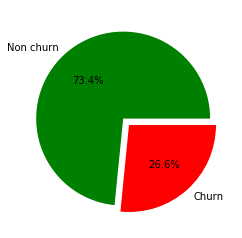

In [10]:
labels='Non churn','Churn'
explode=(0,0.1)
plt.pie((df['Churn'].value_counts())/len(df),labels=labels,explode=explode,autopct='%1.1f%%',colors=['green','red'])

Checking the distribution of churn and non-churn by gender

C:\Users\visha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


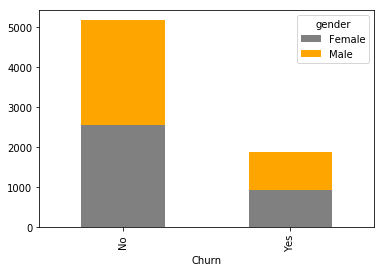

In [11]:
df.groupby('Churn')['gender'].value_counts().unstack(level=-1).plot(kind='bar',stacked=True,colors=['grey','orange'])

Gender split is equal among both churn and non churn customers i.e churn has no relation with the gender

Checking the distribution of churn and non-churn by "Partner"

C:\Users\visha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


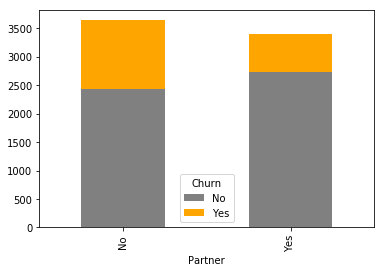

In [12]:
df.groupby('Partner')['Churn'].value_counts().unstack(level=-1).plot(kind='bar',stacked=True,colors=['grey','orange'])

People who don't have partners have a higher chance to churn out

Checking the distribution of churn and non-churn by "Dependents"

C:\Users\visha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


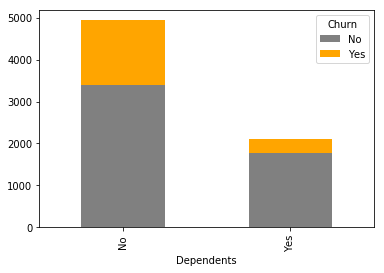

In [13]:
df.groupby('Dependents')['Churn'].value_counts().unstack(level=-1).plot(kind='bar',stacked=True,colors=['grey','orange'])

People who don't have dependents have a higher chance to churn out

Checking churn rate distribution with respect to streaming services

C:\Users\visha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


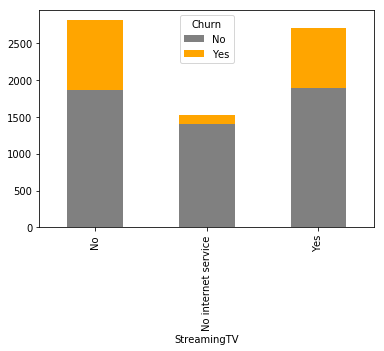

In [14]:
df.groupby('StreamingTV')['Churn'].value_counts().unstack(level=-1).plot(kind='bar',stacked=True,colors=['grey','orange'])

C:\Users\visha\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


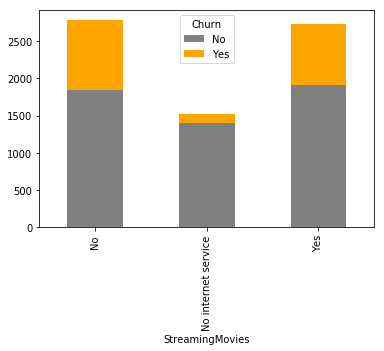

In [15]:
df.groupby('StreamingMovies')['Churn'].value_counts().unstack(level=-1).plot(kind='bar',stacked=True,colors=['grey','orange'])

None of "StreamingTV" and "StreamingMovies" had an impact on churn rate

Plotting a histogram to understand the relation between monthly charges and churn rate

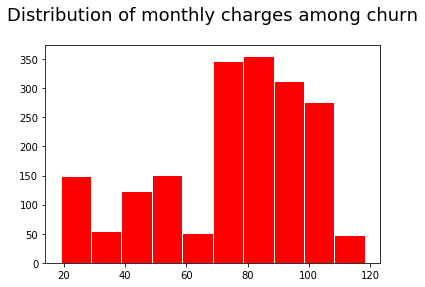

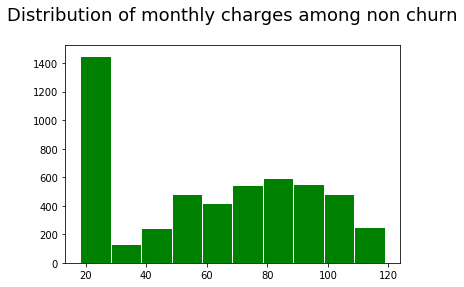

In [16]:
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'],edgecolor='w',color='red')
plt.title('Distribution of monthly charges among churn',fontsize=18,pad=25)
plt.show()

plt.hist(df[df['Churn']=='No']['MonthlyCharges'],edgecolor='w',color='green')
plt.title('Distribution of monthly charges among non churn',fontsize=18,pad=25)
plt.show()

The histogram is not super clear. So let's plot a smoothed out density curve to check this relation

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

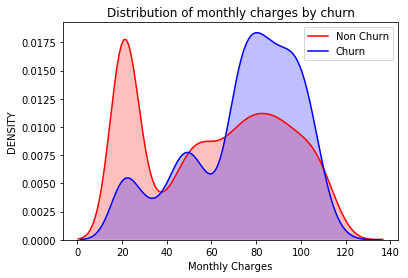

In [17]:
ax = sns.kdeplot(df[(df["Churn"] == 'No')]['MonthlyCharges'], color="Red", shade = True)
ax = sns.kdeplot(df[(df["Churn"] == 'Yes')]['MonthlyCharges'], ax =ax, color="Blue", shade= True)

ax.legend(["Non Churn","Churn"],loc=0)
ax.set_ylabel('DENSITY')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

It is very clear from this chart that people who pay high monthly charges have a greater tendency to move out

Now let's check the impact of total charges on churn rate

Text(0.5, 1.0, 'Distribution of total charges by churn')

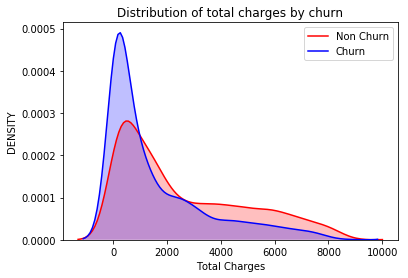

In [18]:
ax = sns.kdeplot(df[(df["Churn"] == 'No')]['TotalCharges'], color="Red", shade = True)
ax = sns.kdeplot(df[(df["Churn"] == 'Yes')]['TotalCharges'], ax =ax, color="Blue", shade= True)

ax.legend(["Non Churn","Churn"],loc=0)
ax.set_ylabel('DENSITY')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Oops! This is a bit strange. There is a higher concentration of churn in lower end of total charges

The monthly charges conveyed a completely different story which also seemed right

Let's find out the reason behind this anamolous behaviour

Text(0, 0.5, 'Count of customers')

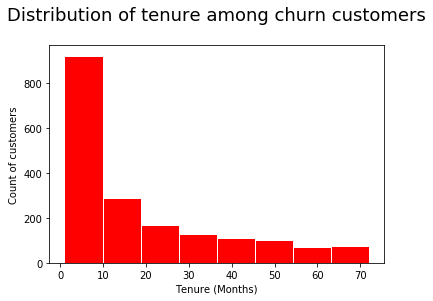

In [19]:
plt.hist(df[df['Churn']=='Yes']['tenure'],edgecolor='w',bins=8,color='red')

plt.title('Distribution of tenure among churn customers',fontsize=18,pad=25)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count of customers')

Gotcha! Since most of the people who left had a very small tenure with Telco, their total charges were also low

Churn
No     1683.60
Yes     703.55
Name: TotalCharges, dtype: float64


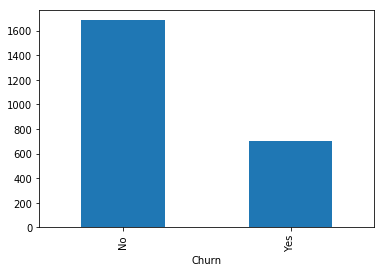

In [20]:
print(df.groupby('Churn')['TotalCharges'].median())
df.groupby('Churn')['TotalCharges'].median().plot(kind='bar')

The median value of Total charges in Churn and Non churn is indeed very different!

Creating a function for donut chart

In [21]:
def plot_donut(sizes,labels,title,colors):
    
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors)

    centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=5)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(title,fontsize=18,pad=25)

    plt.axis('equal')
    plt.show()

Evaluating effect of contract type on churn rate

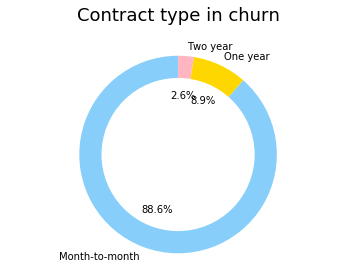

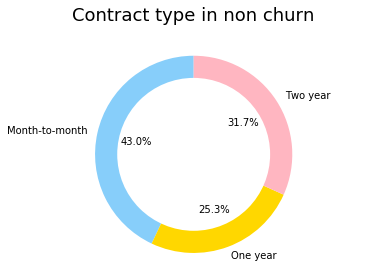

In [22]:
churn_by_Contract=df.groupby('Contract')['Churn'].value_counts().unstack(level=1)

plot_donut(churn_by_Contract['Yes'],churn_by_Contract.index,'Contract type in churn',['lightskyblue', 'gold', 'lightpink'])
plot_donut(churn_by_Contract['No'],churn_by_Contract.index,'Contract type in non churn',['lightskyblue', 'gold', 'lightpink'])

This is an interesting observation! Almost 90% of the people who moved out were on a month level contract with Telco

This also strengthens our inference from the previous chart. There were a lot of people who had a less tenure (<10 months) and also opted for a month level contract with Telco

Checking the impact of payment method on churn rate

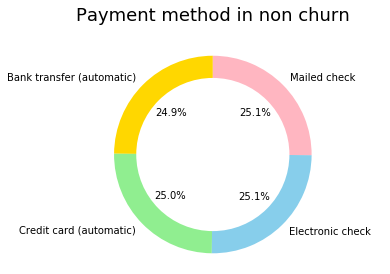

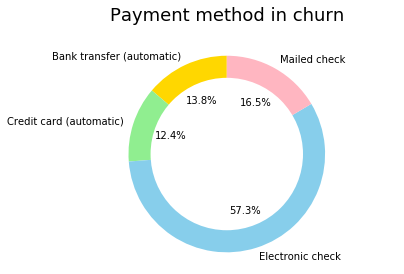

In [23]:
Churn_Senior = df.groupby('PaymentMethod')['Churn'].value_counts().unstack(level=-1)
plot_donut(Churn_Senior['No'],Churn_Senior.index,"Payment method in non churn",['gold','lightgreen','skyblue','lightpink'])
plot_donut(Churn_Senior['Yes'],Churn_Senior.index,"Payment method in churn",['gold','lightgreen','skyblue','lightpink'])

There seems to be a greater tendency among churn customers to use electronic check to make payments

Checking if the churn customer had contacted technical support

In [24]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Changing the 'no internet' values to just 'no' in six columns

In [25]:
df['OnlineSecurity']=df['OnlineSecurity'].replace('No internet service','No')
df['OnlineBackup']=df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection']=df['DeviceProtection'].replace('No internet service','No')
df['TechSupport']=df['TechSupport'].replace('No internet service','No')
df['StreamingTV']=df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies']=df['StreamingMovies'].replace('No internet service','No')

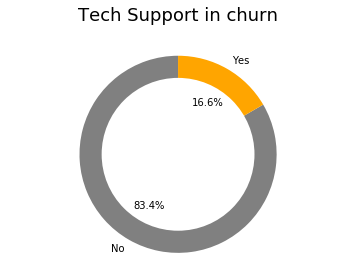

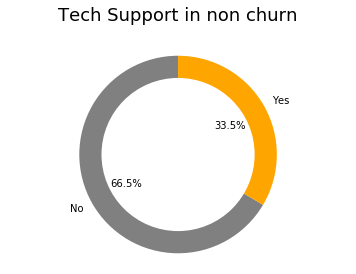

In [26]:
churn_by_TechSupport=df.groupby('TechSupport')['Churn'].value_counts().unstack(level=1)

plot_donut(churn_by_TechSupport['Yes'],churn_by_TechSupport.index,'Tech Support in churn',['grey', 'orange'])
plot_donut(churn_by_TechSupport['No'],churn_by_TechSupport.index,'Tech Support in non churn',['grey', 'orange'])

Only 16.6% of the churn customers have reached out to the technical support which implies people didn't leave Telco due to a technical issue

This point furthers our conclusions from the monthly charges chart that price could be a key reason behind the high churn rate

Checking influence of different internet services on churn rate

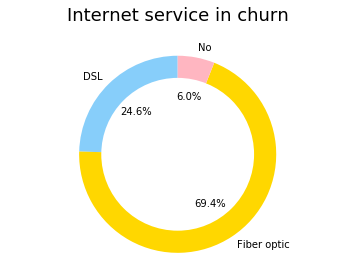

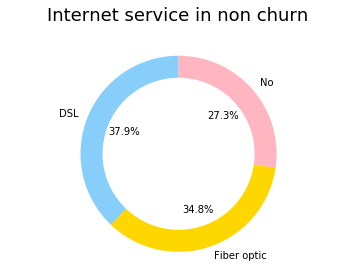

In [27]:
churn_by_InternetService=df.groupby('InternetService')['Churn'].value_counts().unstack(level=1)

plot_donut(churn_by_InternetService['Yes'],churn_by_InternetService.index,'Internet service in churn',['lightskyblue', 'gold', 'lightpink'])
plot_donut(churn_by_InternetService['No'],churn_by_InternetService.index,'Internet service in non churn',['lightskyblue', 'gold', 'lightpink'])

Most of the churn customers used a fiber optic internet service

Now let's check the price range of the fiber optic service

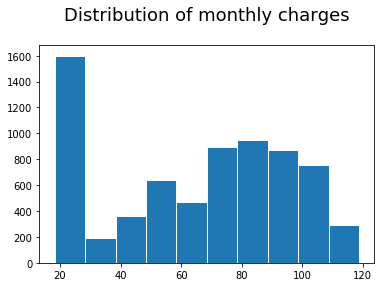

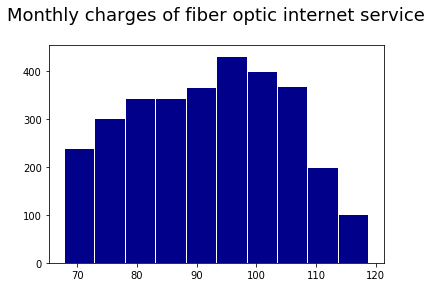

In [28]:
plt.hist(df['MonthlyCharges'],edgecolor='w')
plt.title('Distribution of monthly charges',fontsize=18,pad=25)
plt.show()

plt.hist(df[df['InternetService']=='Fiber optic']['MonthlyCharges'],edgecolor='w',color='darkblue')
plt.title('Monthly charges of fiber optic internet service',fontsize=18,pad=25)
plt.show()

#This chart makes it clear that fiber optic is a very costly service

Were majority of the fiber optic customers on month level contract?

In [29]:
(df[df['InternetService']=='Fiber optic']['Contract'].value_counts(normalize=True).round(4)*100).astype(str) + '%'

Month-to-month    68.73%
One year          17.41%
Two year          13.86%
Name: Contract, dtype: object

Yes, majority of them were on month level contract

## Modeling

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

y=df['Churn']
X=df.drop(['Churn','customerID'], axis=1)
X=pd.get_dummies(X)

#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_test=pd.DataFrame(y_test)

#### Logistic Regression

In [31]:
#Initializing logistic regression
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(X_train, y_train)

# Make predictions on the test data
pred_log_reg = log_reg.predict_proba(X_test)[:, 1]

#Calculating the ROC on test data
print('AUC value for logistic regression is: ',(roc_auc_score(y_test, pred_log_reg)).round(2))

AUC value for logistic regression is:  0.83


C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### SVM

In [32]:
from sklearn.svm import SVC
svm_model = SVC(class_weight = 'balanced', probability=True)

svm_model.fit(X_train, y_train)
# Make predictions on the test data
pred_svm = svm_model.predict_proba(X_test)[:, 1]
#Calculating the ROC on test data
print('AUC value for SVM classifier is: ',(roc_auc_score(y_test, pred_svm)).round(2))

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC value for SVM classifier is:  0.72


#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Initializing random forest
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1) #n_jobs = -1 meaning utilize all system resources

# Fit the model
rf_model = random_forest.fit(X_train, y_train)

# Make predictions on the test data
pred_rf = random_forest.predict_proba(X_test)[:, 1]

#Calculating the ROC on test data
print('AUC value for random forest is: ',(roc_auc_score(y_test, pred_rf)).round(2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


AUC value for random forest is:  0.81


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
#Feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances[feature_importances['importance']>0.03]

,importance
TotalCharges,0.162047
MonthlyCharges,0.151360
tenure,0.138866
Contract_Month-to-month,0.068604
InternetService_Fiber optic,0.038668
PaymentMethod_Electronic check,0.030926


# Who discontinued the services?

People who did not have partners and dependents had a higher chance to churn

# Why did people discontinue Telco services?

From the above analysis we can infer that most of the churn customers have a short tenure with Telco and discontinue due to the high cost of fiber optic internet service

# Recommendation

Telco can develop new plans in fiber optic internet service and these plans should should have a contract period of at least a year!